# 0.0 Imports

In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML

### 0.1 Load Data

In [2]:
df = pd.read_csv('../data/raw/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Helper Functions

In [4]:
def jupyter_settings():
   
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

In [5]:
# Suppress Scientific Notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# 1.0 Data Description

### 1.1 Data Dimension

In [6]:
print(f'Nº Columns: {df.shape[1]}')
print(f'Nº Rows: {df.shape[0]}')

Nº Columns: 21
Nº Rows: 21613


### 1.2 Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1.3 Check & Fillout NAs

In [8]:
# check Na
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 1.4 Data Descriptive

#### Numerical Attributes

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.000,4580301520.865,2876565571.312,1000102.000,2123049194.000,3904930410.000,7308900445.000,9900000190.000
price,21613.000,540088.142,367127.196,75000.000,321950.000,450000.000,645000.000,7700000.000
bedrooms,21613.000,3.371,0.930,0.000,3.000,3.000,4.000,33.000
bathrooms,21613.000,2.115,0.770,0.000,1.750,2.250,2.500,8.000
sqft_living,21613.000,2079.900,918.441,290.000,1427.000,1910.000,2550.000,13540.000
sqft_lot,21613.000,15106.968,41420.512,520.000,5040.000,7618.000,10688.000,1651359.000
floors,21613.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21613.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21613.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21613.000,3.409,0.651,1.000,3.000,3.000,4.000,5.000


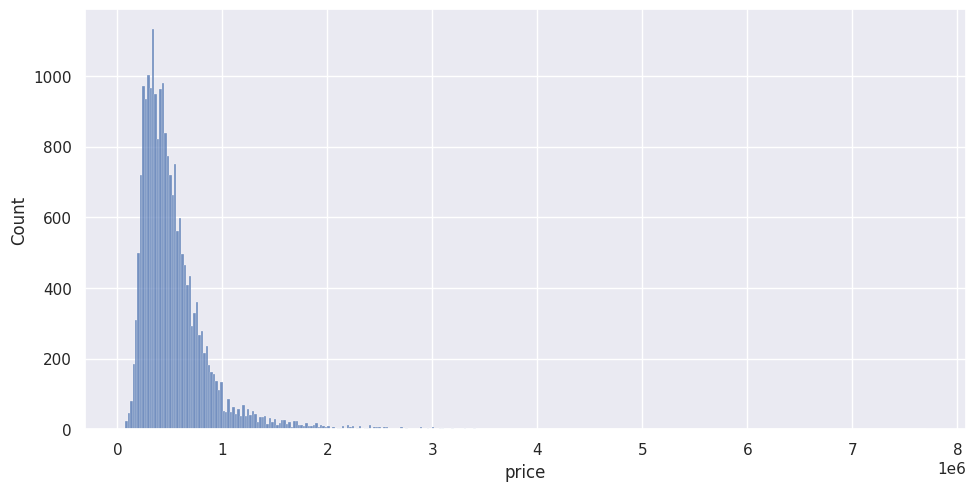

In [10]:
plt.subplot(2,2,1)
sns.histplot(df['price']);

# 2.0 Feature Engineering

In [11]:
df1 = df.copy()

### Change Types

In [12]:
# Date
df1['date'] = pd.to_datetime(df1['date'])

In [13]:
# sqft_living
df1['m2_living'] = df1['sqft_living'].apply(lambda x: x * 0.092903)
# sqft_lot
df1['m2_lot'] = df1['sqft_lot'].apply(lambda x: x * 0.092903)
# sqf_above
df1['m2_above'] = df1['sqft_above'].apply(lambda x: x * 0.092903)
# sqf_basement
df1['m2_basement'] = df1['sqft_basement'].apply(lambda x: x * 0.092903)

In [14]:
# drop old columns
df1 = df1.drop(['sqft_lot', 'sqft_living', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'], axis=1)

In [15]:
# price per m2
df1['price_m2'] = df1['price'] / df1['m2_living'] 

In [23]:
df1.head(100).sort_values('price_m2', ascending=False)

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,m2_living,m2_lot,m2_above,m2_basement,price_m2
21,2524049179,2014-08-26,2000000.000,3,2.750,1.000,0,4,3,9,1968,0,98040,47.532,-122.233,283.354,4168.279,216.464,66.890,7058.305
33,7589200193,2014-11-10,535000.000,3,1.000,1.500,0,0,4,8,1929,0,98117,47.689,-122.375,101.264,278.709,101.264,0.000,5283.206
49,822039084,2015-03-11,1350000.000,3,2.500,1.000,1,2,5,9,1953,0,98070,47.404,-122.451,255.762,6039.160,201.135,54.627,5278.346
27,3303700376,2014-12-01,667000.000,3,1.000,1.500,0,0,5,8,1909,0,98112,47.622,-122.314,130.064,146.880,130.064,0.000,5128.237
77,2391600320,2015-04-20,480000.000,3,1.000,1.000,0,0,3,7,1941,0,98116,47.564,-122.394,96.619,470.089,96.619,0.000,4967.961
94,6021501535,2014-12-23,700000.000,3,1.500,1.000,0,0,3,8,1939,0,98117,47.687,-122.386,146.787,464.515,119.845,26.942,4768.823
85,4232902595,2014-11-14,940000.000,3,1.500,2.000,0,0,3,9,1925,0,98119,47.634,-122.365,198.812,334.451,176.516,22.297,4728.075
43,9270200160,2014-10-28,685000.000,3,1.000,2.000,0,0,3,7,1922,0,98119,47.641,-122.364,145.858,211.819,145.858,0.000,4696.358
52,7518505990,2014-12-31,600000.000,3,1.750,1.000,0,0,4,7,1950,0,98117,47.681,-122.384,130.993,379.044,92.903,38.090,4580.389
69,1802000060,2014-06-12,1325000.000,5,2.250,1.000,0,0,3,8,1965,0,98004,47.630,-122.215,297.290,1872.739,148.645,148.645,4456.934


# 3.0 Data Filtering

In [ ]:
# only house , not lots

# 4.0 EDA

### 4.1 Univariate Analysis

### 4.2 Bivariate Analysis

### 4.3 Multiivariate Analysis

# 5.0 Feature Selection

# 6.0 Data Preparation

# 7.0 Machine Learning